# **Expectativa de Vida (OMS)**

O conjunto de dados relacionado à expectativa de vida e aos fatores de saúde de 193 países foi coletado do mesmo site do repositório de dados da OMS, e os dados econômicos correspondentes foram coletados do site das Nações Unidas.



Dentre todas as categorias de fatores relacionados à saúde, foram selecionados apenas os fatores críticos mais representativos. Observou-se que, nos últimos 15 anos, houve um grande desenvolvimento no setor de saúde, resultando na redução das taxas de mortalidade humana, especialmente nos países em desenvolvimento, em comparação com os últimos 30 anos. Portanto, neste projeto, consideramos dados do período de 2000 a 2015 para 193 países para análises posteriores.

# **Explicação das Colunas**


* Country - País                        
* Year - Idade                               
* Status - Status de país desenvolvido ou em desenvolvimento                            
* Life expectancy - Expectativa de vida por idade               
* Adult Mortality - Taxa de mortalidade adulta para ambos os sexos (probabilidade de morte entre 15 e 60 anos por 1000 habitantes)         
* infant deaths - Número de mortes infantis por 1000 habitantes
* Alcohol - Álcool, consumo per capita (15+) registado (em litros de álcool puro)
* percentage expenditure - Percentual de Gastos, despesas com saúde como porcentagem do Produto Interno Bruto per capita (%)
* Hepatitis B - Cobertura vacinal contra hepatite B (HepB) em crianças de 1 ano de idade (%)
* Measles - Sarampo, número de casos notificados por 1000 habitantes.
* BMI - IMC, Índice de Massa Corporal médio de toda a população
* under-five deaths - Número de mortes de crianças menores de cinco anos por 1000 habitantes
* Polio - Cobertura vacinal contra a poliomielite (Pol3) em crianças de 1 ano de idade (%)   
* Total expenditure - Despesas do governo geral com saúde como porcentagem das despesas totais do governo (%)
* Diphtheria - Cobertura da vacinação contra difteria, tétano e coqueluche (DTP3) em crianças de 1 ano de idade (%)
* HIV/AIDS - Mortes por 1.000 nascidos vivos por HIV/AIDS (0-4 anos)  
* GDP - PIB, Produto Interno Bruto per capita (em USD)  
* Population - População do País
* thinness  1-19 years - Magreza 10 - 19 anos, prevalência de magreza entre crianças e adolescentes de 10 a 19 anos (%)  
* thinness 5-9 years - Prevalência de magreza em crianças de 5 a 9 anos (%)     
* Income composition of resources - Índice de Desenvolvimento Humano em termos de composição da renda dos recursos (índice variando de 0 a 1)  
* Schooling - Escolarização, número de anos de escolaridade (anos)   




## *Importações*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("expectancy.csv")
df.head()


,Unnamed: 0,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,Afghanistan,2O15,Developing,65.0,263.0,62,0.01,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,Afghanistan,2O14,Developing,59.9,271.0,64,0.01,73.523582,62.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2,Afghanistan,2O13,Developing,59.9,268.0,66,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,3,Afghanistan,2O12,Developing,59.5,272.0,69,0.01,78.184215,67.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,4,Afghanistan,2O11,Developing,59.2,275.0,71,0.01,7.097109,68.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# **1. Análise Exploratória Geral**

Responda às seguintes perguntas:


1.   Quantas linhas e colunas temos no nosso dataset?
2.   Temos dados nulos? Se sim, qual a porcentagem deles? É uma porcentagem significativa?
3. Sobre os dados nulos com maior porcentagem, qual o tipo deles? Tente pensar em hipóteses do porquê eles estão nulos.
4. Existem duplicatas?
5. Todas as colunas estão com o seu tipo correto?
6. Como verificar as principais estatísticas das colunas numéricas? Escolha uma coluna com valores nulos para verificar como a média, moda, mediana.




In [3]:
# 1. Quantas linhas e colunas temos no nosso dataset?

# Utilizando dicionario para conseguir o numero de linhas e colunas
# O pandas tem a função shape que retorna (linhas, colunas)

(linhas, colunas) = df.shape
print(f"Número de linhas: {linhas}")
print(f"Número de colunas: {colunas}")

Número de linhas: 2948
Número de colunas: 23


In [4]:
# 2. Temos dados nulos? Se sim, qual a porcentagem deles? É uma porcentagem significativa?

# Quantidade de nulos por coluna
null_count = df.isnull().sum()

# Porcentagem de nulos por coluna
null_percent = (df.isnull().sum() / len(df)) * 100

# Criando novo DataFrame apenas com colunas que possuem nulos
df_nulos = pd.DataFrame({
    'Quantidade de Nulos': null_count,
    'Percentual (%)': null_percent
})

# Filtrar apenas onde há nulos
df_nulos = df_nulos[df_nulos['Quantidade de Nulos'] > 0]

# Ordenar do maior para o menor percentual
df_nulos = df_nulos.sort_values(by='Percentual (%)', ascending=False)

display(df_nulos)

,Quantidade de Nulos,Percentual (%)
Population,653,22.150611
Hepatitis B,556,18.860244
GDP,448,15.196744
Total expenditure,226,7.666214
Alcohol,194,6.580733
Income composition of resources,167,5.664858
Schooling,163,5.529172
thinness 5-9 years,34,1.153324
thinness 1-19 years,34,1.153324
BMI,34,1.153324


In [5]:
print("""
Algumas colunas apresentam porcentagens relevantes de valores nulos.
'Population' (~22%), 'Hepatitis B' (~19%) e 'GDP' (~15%) possuem ausência significativa de dados, o que pode influenciar análises e exige um tratamento mais cuidadoso.

Já colunas como 'Alcohol', 'Schooling' e 'Income composition of resources' possuem entre 5% e 7% de nulos, o que é moderado e pode ser tratado com métodos simples.

As demais colunas possuem menos de 1% de valores ausentes, o que não causa impacto relevante e pode ser ajustado facilmente.
""")


Algumas colunas apresentam porcentagens relevantes de valores nulos.
'Population' (~22%), 'Hepatitis B' (~19%) e 'GDP' (~15%) possuem ausência significativa de dados, o que pode influenciar análises e exige um tratamento mais cuidadoso.

Já colunas como 'Alcohol', 'Schooling' e 'Income composition of resources' possuem entre 5% e 7% de nulos, o que é moderado e pode ser tratado com métodos simples.

As demais colunas possuem menos de 1% de valores ausentes, o que não causa impacto relevante e pode ser ajustado facilmente.



In [6]:
# 3. Sobre os dados nulos com maior porcentagem, qual o tipo deles?
display(df[df_nulos.index].dtypes)

Population                         float64
Hepatitis B                        float64
GDP                                float64
Total expenditure                  float64
Alcohol                            float64
Income composition of resources    float64
Schooling                          float64
thinness 5-9 years                 float64
thinness  1-19 years               float64
BMI                                float64
Polio                              float64
Diphtheria                         float64
Life expectancy                    float64
Adult Mortality                    float64
dtype: object

In [7]:
print("""
A maioria das colunas com maior porcentagem de nulos são numéricas e representam indicadores socioeconômicos ou de saúde que dependem de reporte dos países.
Os valores ausentes geralmente ocorrem porque alguns países não informaram esses dados em determinados anos.

- 'Population', 'Hepatitis B' e 'GDP' possuem nulos mais altos devido à falta de atualização ou envio de dados oficiais.
- Indicadores como 'Alcohol', 'Schooling' e 'Income composition' têm nulos moderados, possivelmente ligados à ausência de pesquisas ou registros no período.
""")


A maioria das colunas com maior porcentagem de nulos são numéricas e representam indicadores socioeconômicos ou de saúde que dependem de reporte dos países.
Os valores ausentes geralmente ocorrem porque alguns países não informaram esses dados em determinados anos.

- 'Population', 'Hepatitis B' e 'GDP' possuem nulos mais altos devido à falta de atualização ou envio de dados oficiais.
- Indicadores como 'Alcohol', 'Schooling' e 'Income composition' têm nulos moderados, possivelmente ligados à ausência de pesquisas ou registros no período.



In [8]:
# 4. Existem duplicatas?
duplicatas = df.duplicated().sum()
print(f"Quantidade de linhas duplicadas: {duplicatas}")
df[df.duplicated()]

Quantidade de linhas duplicadas: 5


,Unnamed: 0,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2943,840,Equatorial Guinea,2OO9,Developing,55.7,34.0,3,7.97,115.069242,NaN,...,57.0,5.32,43.0,7.3,1653.293700,9.911100e+04,9.2,9.2,0.590,9.1
2944,1037,Greece,2OO4,Developing,79.2,81.0,0,9.56,287.612452,92.0,...,95.0,8.30,95.0,0.1,21955.149000,1.955141e+06,0.8,0.8,0.830,15.3
2945,2399,South Africa,2OO9,Developing,56.5,449.0,46,7.60,782.598714,74.0,...,75.0,8.39,76.0,19.0,5888.628400,5.255813e+06,8.1,9.8,0.622,12.8
2946,678,Cyprus,2O1O,Developed,79.5,59.0,0,11.32,283.330026,96.0,...,99.0,7.23,99.0,0.1,3818.463960,1.112670e+05,0.9,1.0,0.853,14.6
2947,196,Bangladesh,2O11,Developing,73.0,14.0,118,0.01,62.349885,96.0,...,96.0,3.16,96.0,0.1,835.789341,1.539119e+08,18.7,19.2,0.545,9.4


In [9]:
# 5. Todas as colunas estão com o seu tipo correto?
df.dtypes

Unnamed: 0                           int64
Country                             object
Year                                object
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: obje

In [10]:
print("""
A maioria das colunas está com tipos adequados.
A coluna 'Unnamed: 0' não é necessária e pode ser removida.
A coluna 'Year' está como texto e deve ser convertida para inteiro,
As demais colunas numéricas estão corretas.
""")


A maioria das colunas está com tipos adequados.
A coluna 'Unnamed: 0' não é necessária e pode ser removida.
A coluna 'Year' está como texto e deve ser convertida para inteiro,
As demais colunas numéricas estão corretas.



In [11]:
# 6. Como verificar as principais estatísticas das colunas numéricas?
df.describe()

,Unnamed: 0,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2948.000000,2938.000000,2938.000000,2948.000000,2754.000000,2948.000000,2392.000000,2948.000000,2914.000000,2948.000000,2929.000000,2722.000000,2929.000000,2948.000000,2500.000000,2.295000e+03,2914.000000,2914.000000,2781.000000,2785.000000
mean,1470.252035,69.226344,164.723281,30.286635,4.606961,737.190647,80.932692,2422.627883,38.341661,42.013908,82.541140,5.938244,82.311028,1.751493,7484.530433,1.278354e+07,4.844818,4.876047,0.627772,11.993896
std,849.733306,9.525726,124.407794,117.749239,4.053810,1984.794497,25.084151,11453.807243,20.041486,160.204764,23.441848,2.495948,23.735894,5.089702,14251.634585,6.096690e+07,4.423995,4.513231,0.210705,3.356053
min,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,734.750000,63.100000,74.000000,0.000000,0.880000,4.768003,77.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,464.218481,1.947545e+05,1.600000,1.500000,0.493000,10.100000
50%,1469.500000,72.100000,144.000000,3.000000,3.760000,65.723144,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1770.253970,1.388115e+06,3.300000,3.300000,0.677000,12.300000
75%,2206.250000,75.700000,227.750000,22.000000,7.717500,441.977840,97.000000,362.000000,56.200000,28.000000,97.000000,7.490000,97.000000,0.800000,5935.136533,7.417429e+06,7.200000,7.200000,0.780000,14.300000
max,2942.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [12]:
display(df['Hepatitis B'].describe())

print("\n")
media = df['Hepatitis B'].mean()
mediana = df['Hepatitis B'].median()
moda = df['Hepatitis B'].mode()[0]

print("Média:", media)
print("Mediana:", mediana)
print("Moda:", moda)

count    2392.000000
mean       80.932692
std        25.084151
min         1.000000
25%        77.000000
50%        92.000000
75%        97.000000
max        99.000000
Name: Hepatitis B, dtype: float64



Média: 80.9326923076923
Mediana: 92.0
Moda: 99.0


# **2. Análise Univariada**

7. Como as variáveis numéricas estão distribuídas? Alguma apresenta distribuição normal, ou todas são assimétricas?
8. Qual país aparece com maior frequência? E o menos frequente?
9. Existem mais países em desenvolvimento ou desenvolvidos?
10. Os outliers existentes são reais ou valores extremos que não condizem com a realidade?
11. Qual o ano que apresenta mais informações?
12. Como está a escolaridade média?


array([[<Axes: title={'center': 'Life expectancy'}>,
        <Axes: title={'center': 'Adult Mortality'}>,
        <Axes: title={'center': 'infant deaths'}>,
        <Axes: title={'center': 'Alcohol'}>],
       [<Axes: title={'center': 'percentage expenditure'}>,
        <Axes: title={'center': 'Hepatitis B'}>,
        <Axes: title={'center': 'Measles'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'under-five deaths'}>,
        <Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Total expenditure'}>,
        <Axes: title={'center': 'Diphtheria'}>],
       [<Axes: title={'center': 'HIV/AIDS'}>,
        <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'thinness  1-19 years'}>],
       [<Axes: title={'center': 'thinness 5-9 years'}>,
        <Axes: title={'center': 'Income composition of resources'}>,
        <Axes: title={'center': 'Schooling'}>, <Axes: >]], dtype=object)

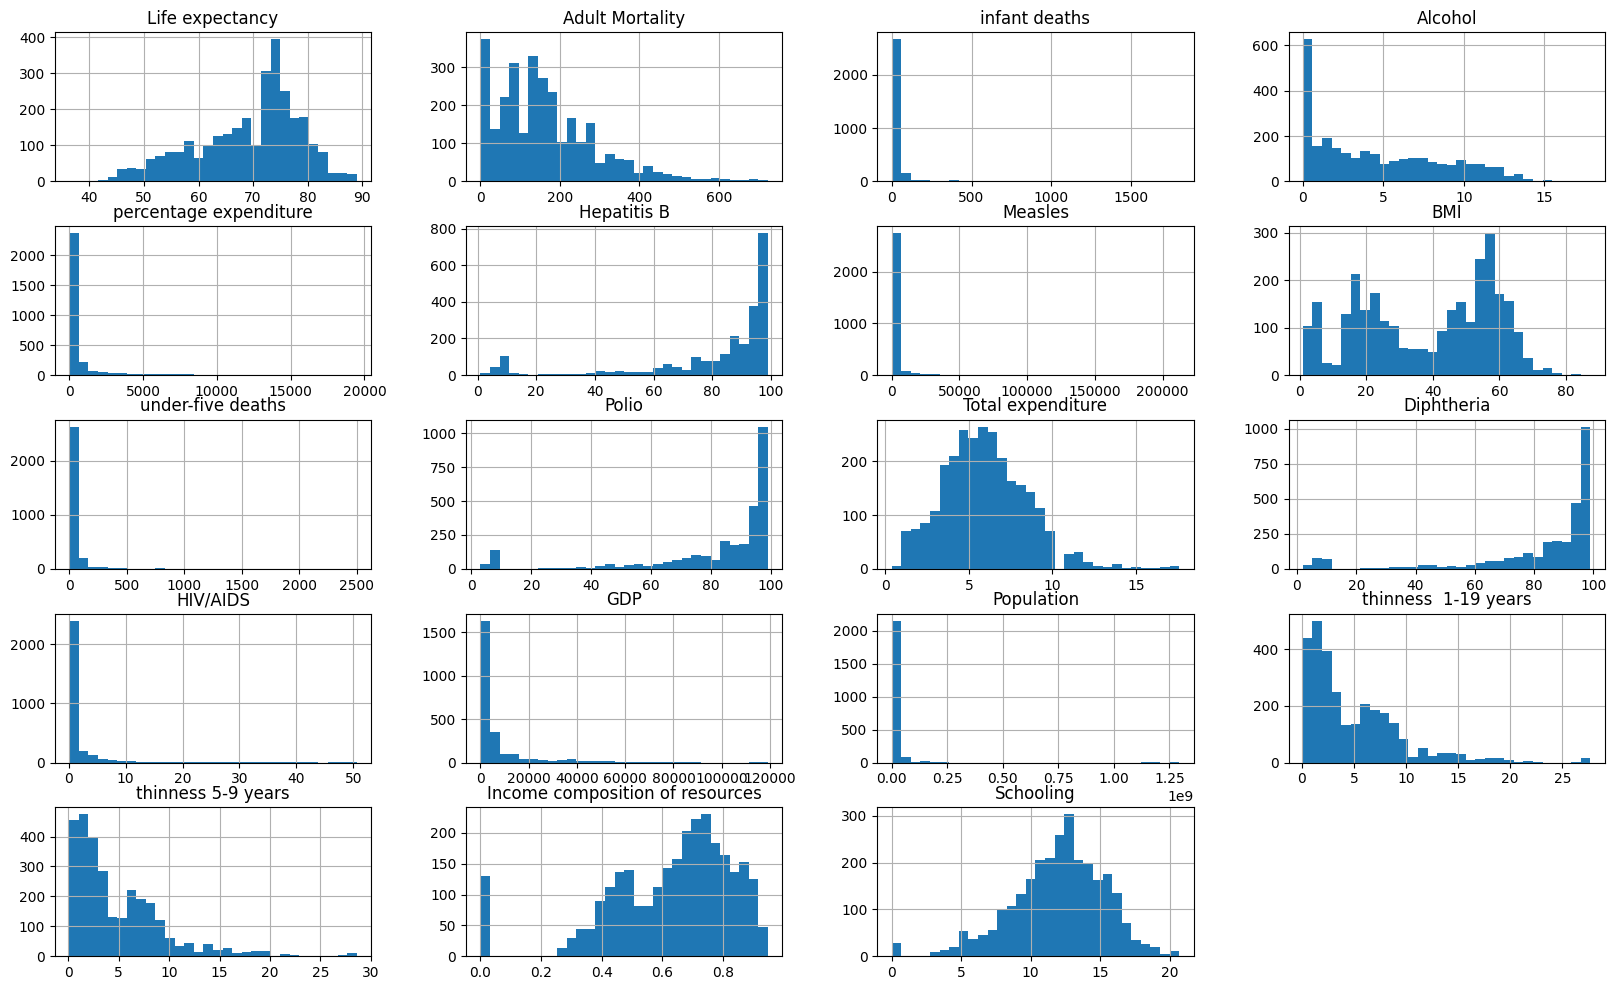

In [13]:
# 7. Como as variáveis numéricas estão distribuídas? Alguma apresenta distribuição normal, ou todas são assimétricas?
df_numerico = df.drop(columns=['Unnamed: 0'])  # remove só para analisar
df_numerico.hist(figsize=(20, 12), bins=30)

In [14]:
# Selecionar apenas colunas numéricas
df_num = df.select_dtypes(include=['float64', 'int64'])

# Calcular assimetria e curtose
skew_vals = df_num.skew()
kurt_vals = df_num.kurt()

# Criar DataFrame consolidado
stats_dist = pd.DataFrame({
    'Skewness (Assimetria)': skew_vals,
    'Kurtosis (Curtose)': kurt_vals
}).sort_values(by='Skewness (Assimetria)', ascending=False)

# Exibir apenas o resultado final formatado
display(stats_dist.style.background_gradient(cmap='coolwarm'))

print("""
• Skewness > 0   →   distribuição com cauda longa à direita.
• Skewness < 0   →   cauda longa à esquerda.
• Curtose  > 0   →   presença de valores extremos (outliers).
""")

,Skewness (Assimetria),Kurtosis (Curtose)
Population,15.892928,297.697277
infant deaths,9.798416,116.359916
under-five deaths,9.506073,110.051800
Measles,9.443148,115.004832
HIV/AIDS,5.359436,34.452811
percentage expenditure,4.659722,26.668632
GDP,3.207011,12.351364
thinness 5-9 years,1.773788,4.332686
thinness 1-19 years,1.708415,3.949176
Adult Mortality,1.174099,1.736258



• Skewness > 0   →   distribuição com cauda longa à direita.
• Skewness < 0   →   cauda longa à esquerda.
• Curtose  > 0   →   presença de valores extremos (outliers).



In [15]:
print("""
A maioria das variáveis numéricas apresenta distribuição assimétrica.
Observamos valores de skewness positivos bem elevados em colunas como 'Population',
'infant deaths', 'Measles' e 'HIV/AIDS', indicando cauda longa à direita e presença
de poucos valores muito altos em comparação ao restante dos países.

Já variáveis como 'Life expectancy', 'BMI' e 'Total expenditure' possuem assimetria
mais baixa, ficando mais próximas de uma distribuição simétrica, porém ainda assim
não chegam a representar uma distribuição completamente normal.

Além disso, muitos valores de curtose são positivos, o que reforça a existência
de outliers e concentrações extremas.

Portanto:
→ Nenhuma variável segue distribuição normal de forma clara.
→ A maior parte apresenta assimetria (principalmente positiva).
→ Há presença relevante de valores extremos que podem influenciar análises futuras.
""")


A maioria das variáveis numéricas apresenta distribuição assimétrica.
Observamos valores de skewness positivos bem elevados em colunas como 'Population',
'infant deaths', 'Measles' e 'HIV/AIDS', indicando cauda longa à direita e presença
de poucos valores muito altos em comparação ao restante dos países.

Já variáveis como 'Life expectancy', 'BMI' e 'Total expenditure' possuem assimetria
mais baixa, ficando mais próximas de uma distribuição simétrica, porém ainda assim
não chegam a representar uma distribuição completamente normal.

Além disso, muitos valores de curtose são positivos, o que reforça a existência
de outliers e concentrações extremas.

Portanto:
→ Nenhuma variável segue distribuição normal de forma clara.
→ A maior parte apresenta assimetria (principalmente positiva).
→ Há presença relevante de valores extremos que podem influenciar análises futuras.



País que mais aparece:
Bahrain - 17 registros

País que menos aparece:
Dominica - 1 registro(s)



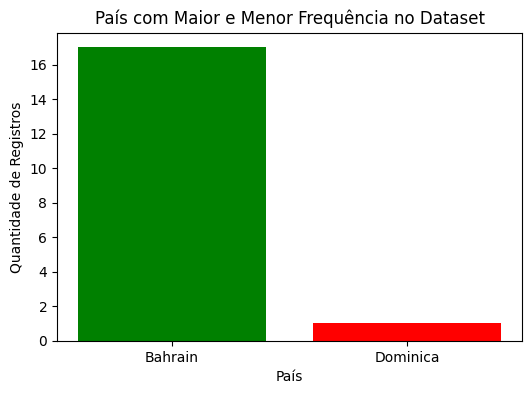

In [16]:
# 8. Qual país aparece com maior frequência? E o menos frequente?

# Contando a frequência de cada país no dataset
country_counts = df['Country'].value_counts()

# País mais frequente
most_freq_country = country_counts.idxmax()
most_freq_count = country_counts.max()

# País menos frequente
least_freq_country = country_counts.idxmin()
least_freq_count = country_counts.min()

print("País que mais aparece:")
print(f"{most_freq_country} - {most_freq_count} registros\n")

print("País que menos aparece:")
print(f"{least_freq_country} - {least_freq_count} registro(s)\n")

# Dados para o gráfico
freq_data = pd.DataFrame({
    'País': [most_freq_country, least_freq_country],
    'Frequência': [most_freq_count, least_freq_count]
})

# Gráfico
plt.figure(figsize=(6, 4))
plt.bar(freq_data['País'], freq_data['Frequência'], color=['green', 'red'])
plt.title("País com Maior e Menor Frequência no Dataset")
plt.xlabel("País")
plt.ylabel("Quantidade de Registros")
plt.show()

Contagem de países por status:
Status
Developing    2434
Developed      514
Name: count, dtype: int64 



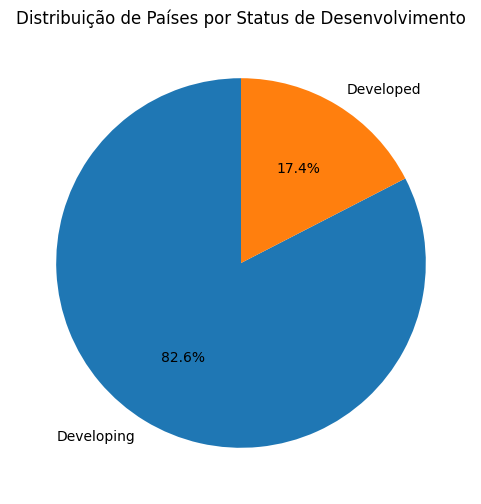

In [17]:
# 9. Existem mais países em desenvolvimento ou desenvolvidos?

# Contagem de status
status_counts = df['Status'].value_counts()

print("Contagem de países por status:")
print(status_counts, "\n")

# Gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribuição de Países por Status de Desenvolvimento")
plt.show()

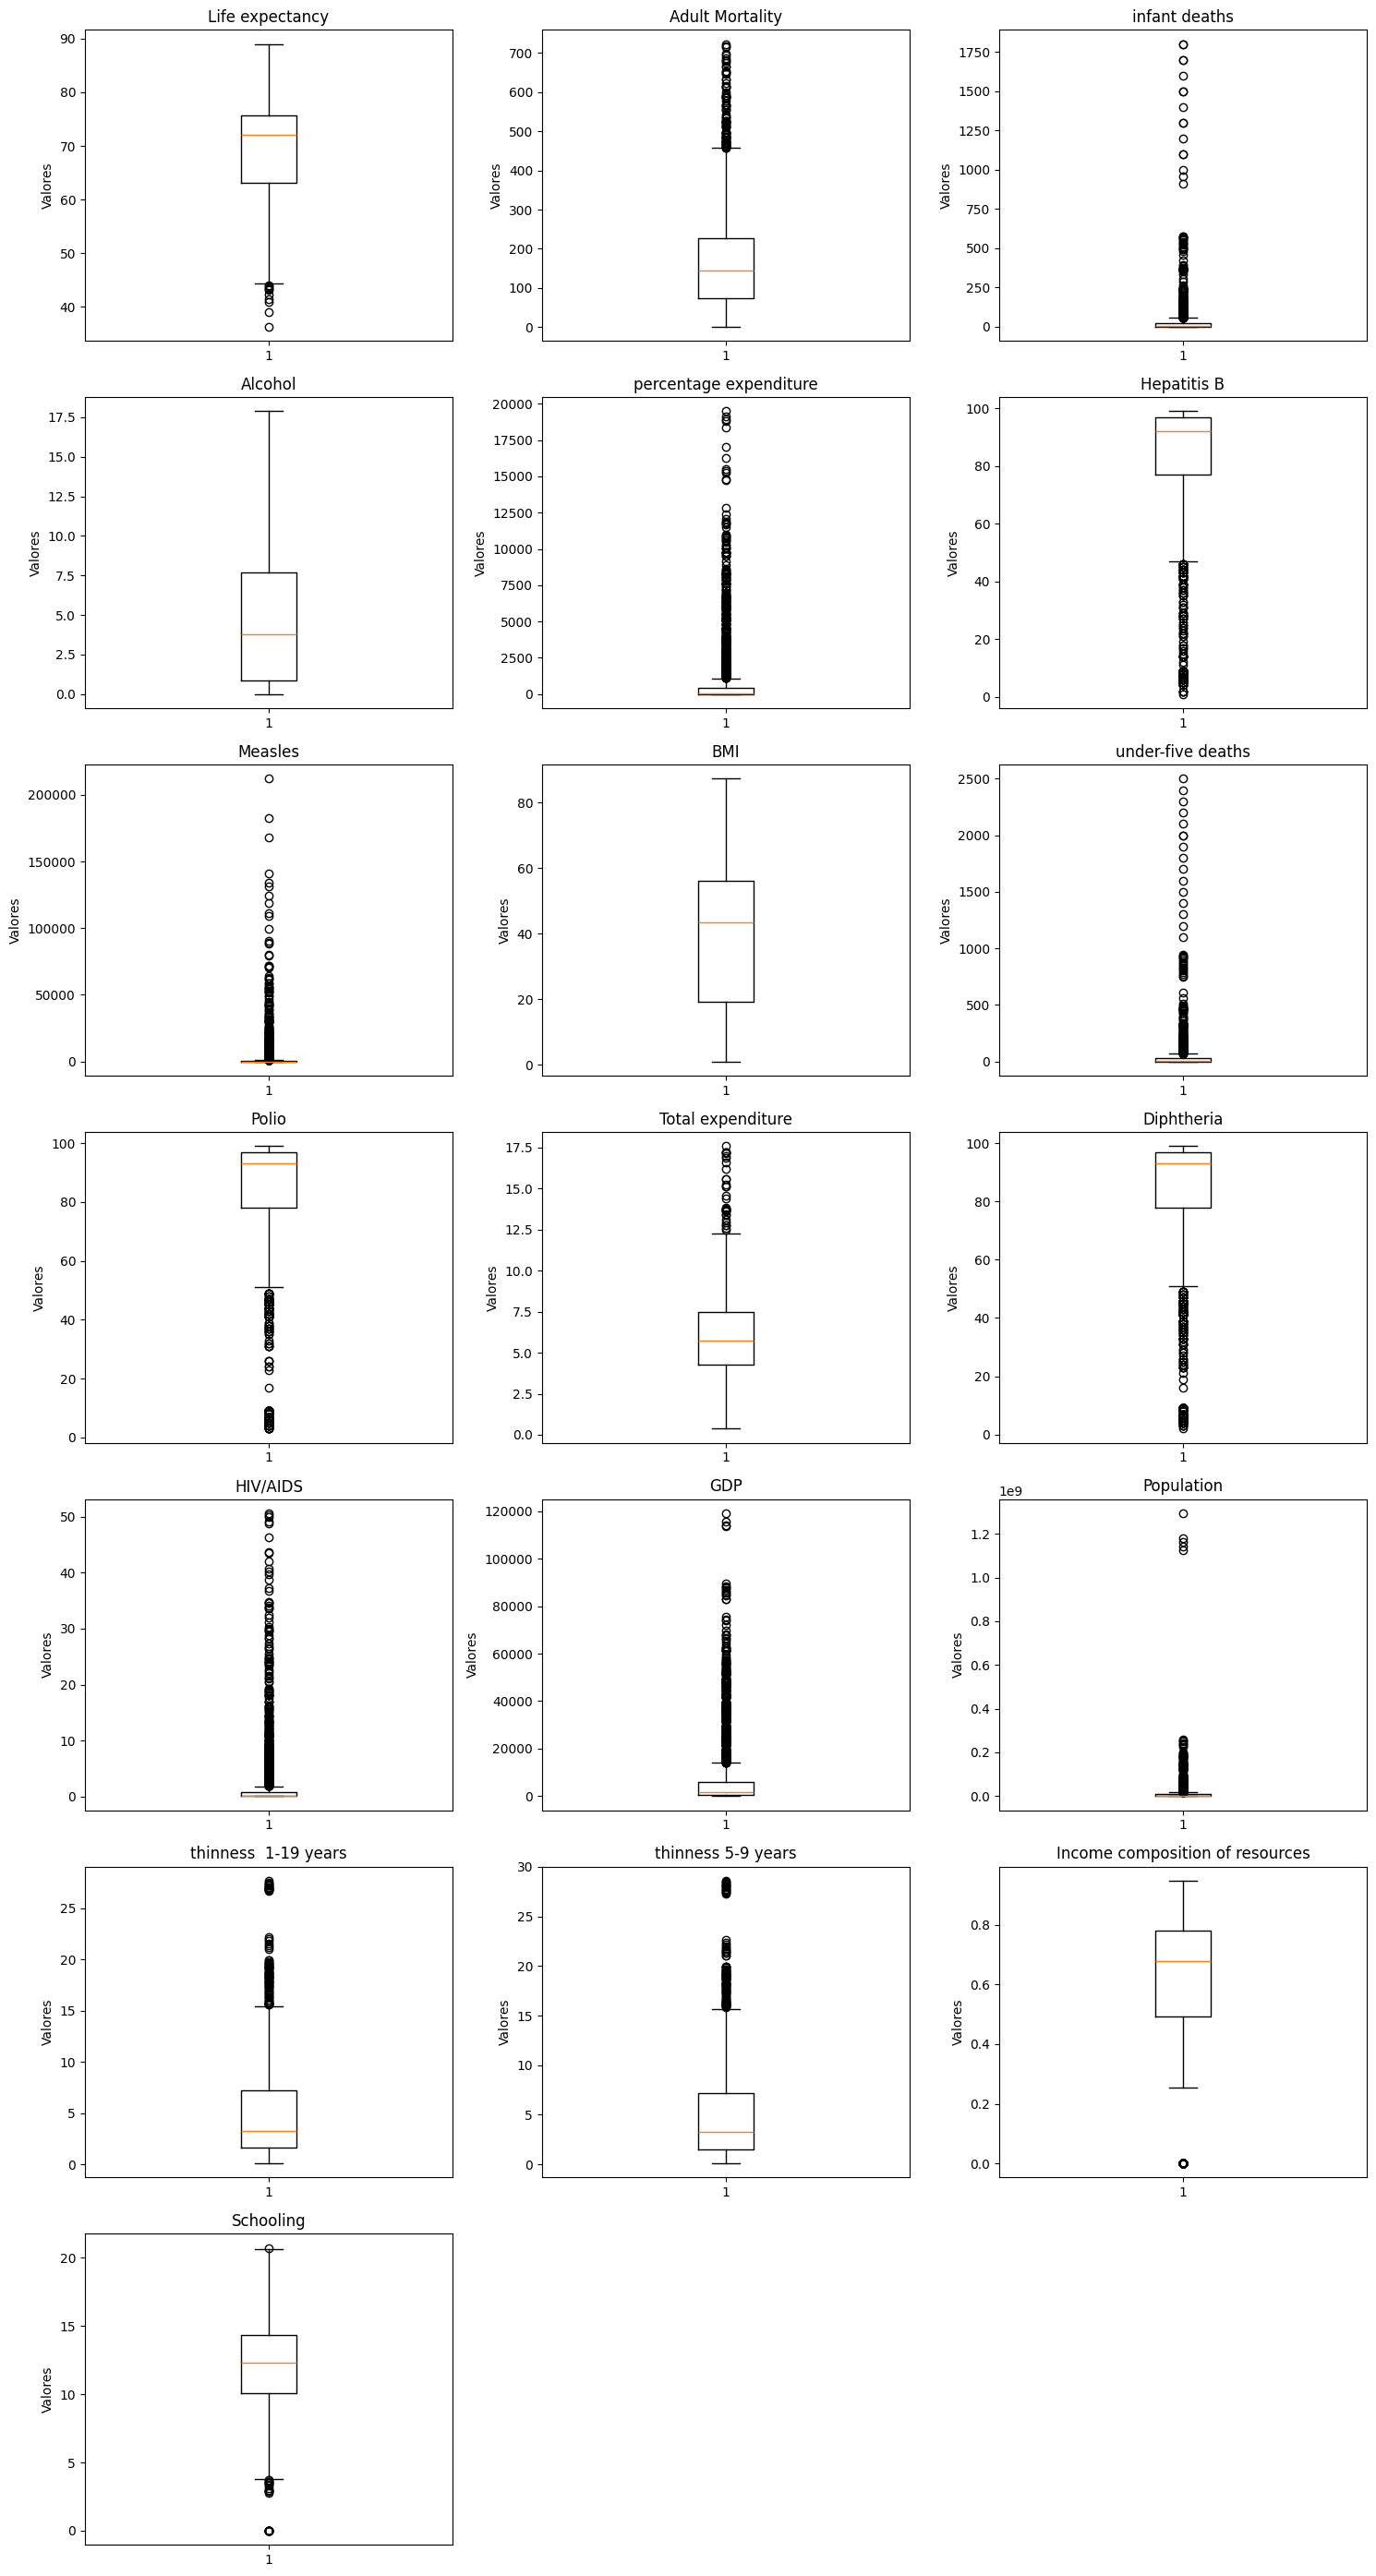

In [18]:
# 10. Os outliers existentes são reais ou valores extremos que não condizem com a realidade?

numeric_cols = df_numerico.select_dtypes(include=['float64', 'int64']).columns
num_cols = len(numeric_cols)

# Configurando o layout (3 colunas por linha)
cols = 3
rows = (num_cols // cols) + (1 if num_cols % cols != 0 else 0)

plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    plt.boxplot(df_numerico[col].dropna())
    plt.title(f"{col}")
    plt.xlabel("")
    plt.ylabel("Valores")

plt.tight_layout()
plt.show()

In [19]:
print("""
Ao observar os boxplots, nota-se que várias variáveis apresentam valores fora do intervalo interquartil.
Esses outliers NÃO são necessariamente erros.

- Variáveis relacionadas à saúde pública (ex: 'infant deaths', 'HIV/AIDS', 'Measles', 'Adult Mortality')
  possuem outliers reais, pois refletem diferenças entre países desenvolvidos e em desenvolvimento.

- Variáveis econômicas como 'GDP' e 'Population' também variam muito entre países, portanto os valores extremos são esperados.

- Já em variáveis como 'BMI', 'Alcohol' e 'Schooling', alguns valores muito extremos podem não refletir condições reais,
  sugerindo possível inconsistência ou necessidade de tratamento adicional.

Conclusão:
A maioria dos outliers representa diferenças reais entre países, não devendo ser removidos automaticamente.
Apenas variáveis com valores muito improváveis devem passar por análise ou tratamento antes de modelagem.
""")


Ao observar os boxplots, nota-se que várias variáveis apresentam valores fora do intervalo interquartil.
Esses outliers NÃO são necessariamente erros.

- Variáveis relacionadas à saúde pública (ex: 'infant deaths', 'HIV/AIDS', 'Measles', 'Adult Mortality')
  possuem outliers reais, pois refletem diferenças entre países desenvolvidos e em desenvolvimento.

- Variáveis econômicas como 'GDP' e 'Population' também variam muito entre países, portanto os valores extremos são esperados.

- Já em variáveis como 'BMI', 'Alcohol' e 'Schooling', alguns valores muito extremos podem não refletir condições reais,
  sugerindo possível inconsistência ou necessidade de tratamento adicional.

Conclusão:
A maioria dos outliers representa diferenças reais entre países, não devendo ser removidos automaticamente.
Apenas variáveis com valores muito improváveis devem passar por análise ou tratamento antes de modelagem.



O ano com mais informações é 2013, com 193 registros.



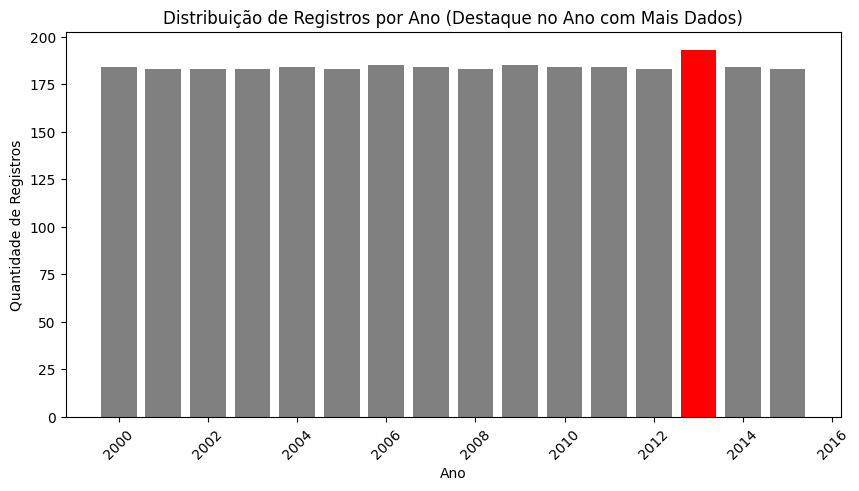

In [20]:
# 11. Qual o ano que apresenta mais informações?

# Corrigindo possíveis erros de digitação (troca O -> 0)
df['Year'] = df['Year'].astype(str).str.replace('O', '0')

# Convertendo para inteiro
df['Year'] = df['Year'].astype(int)

# Contando registros por ano
year_counts = df['Year'].value_counts().sort_index()

# Ano mais frequente
most_freq_year = year_counts.idxmax()
most_freq_count = year_counts.max()

print(f"O ano com mais informações é {most_freq_year}, com {most_freq_count} registros.\n")

# Gráfico
plt.figure(figsize=(10,5))

colors = ['gray' if year != most_freq_year else 'red' for year in year_counts.index]

plt.bar(year_counts.index, year_counts.values, color=colors)

plt.title("Distribuição de Registros por Ano (Destaque no Ano com Mais Dados)")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Registros")
plt.xticks(rotation=45)
plt.show()

Escolaridade média: 11.99 anos
Mediana da escolaridade: 12.30 anos

A média e a mediana estão próximas, indicando que a distribuição não é extremamente distorcida.



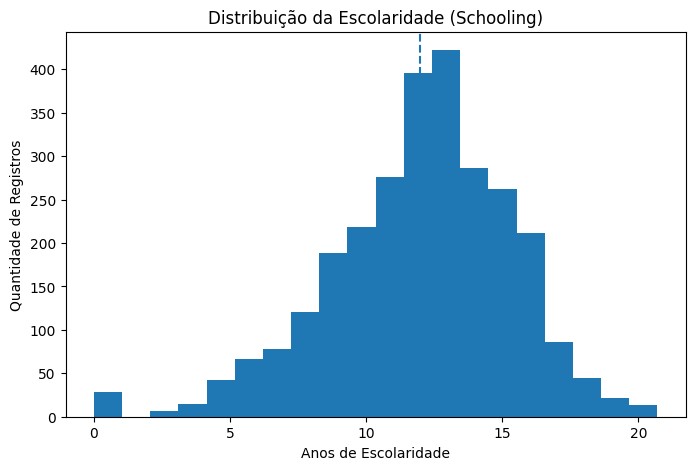

In [21]:
# 12. Como está a escolaridade média?

# Descritivo estatístico
school_mean = df['Schooling'].mean()
school_median = df['Schooling'].median()

print(f"Escolaridade média: {school_mean:.2f} anos")
print(f"Mediana da escolaridade: {school_median:.2f} anos\n")

print("A média e a mediana estão próximas, indicando que a distribuição não é extremamente distorcida.\n")

# Histograma + linha da média
plt.figure(figsize=(8,5))
plt.hist(df['Schooling'].dropna(), bins=20)
plt.axvline(school_mean, linestyle='--')
plt.title("Distribuição da Escolaridade (Schooling)")
plt.xlabel("Anos de Escolaridade")
plt.ylabel("Quantidade de Registros")
plt.show()

# **3. Análise Bivariada**

13. Países mais ricos vivem mais?
14. O nível de escolaridade influencia a expectativa de vida?
15. Países desenvolvidos consomem mais álcool?
16. A mortalidade infantil ainda é um problema em países em desenvolvimento?
17. Como a expectativa de vida evoluiu ao longo do tempo?
18. Países com maior investimento em saúde têm maior expectativa de vida?

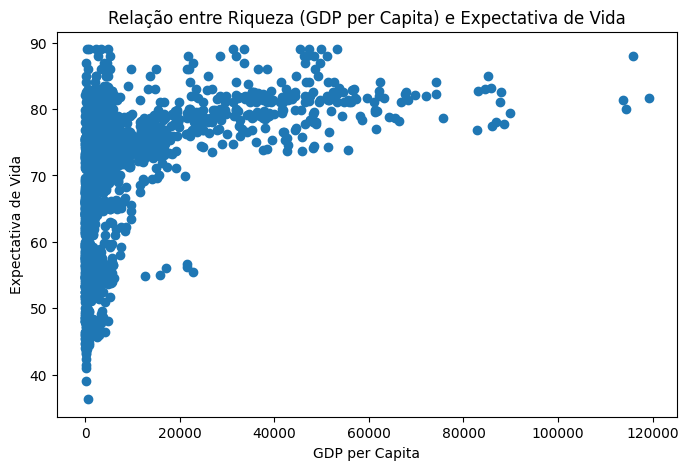


Correlação entre GDP e Expectativa de Vida: 0.461

Existe relação positiva moderada: países mais ricos geralmente vivem mais, mas há exceções.


In [22]:
# 13. Países mais ricos vivem mais?

plt.figure(figsize=(8, 5))
plt.scatter(df['GDP'], df['Life expectancy'])
plt.title("Relação entre Riqueza (GDP per Capita) e Expectativa de Vida")
plt.xlabel("GDP per Capita")
plt.ylabel("Expectativa de Vida")
plt.show()

# Calculando a correlação entre GDP e Life Expectancy
correlacao = df[['GDP', 'Life expectancy']].corr().iloc[0,1]

print(f"\nCorrelação entre GDP e Expectativa de Vida: {correlacao:.3f}")

# Interpretação automática
if correlacao > 0.5:
    print("\nExiste forte evidência de que países mais ricos tendem a ter maior expectativa de vida.")
elif correlacao > 0.2:
    print("\nExiste relação positiva moderada: países mais ricos geralmente vivem mais, mas há exceções.")
else:
    print("\nRelação fraca: riqueza não explica diretamente a expectativa de vida neste conjunto de dados.")


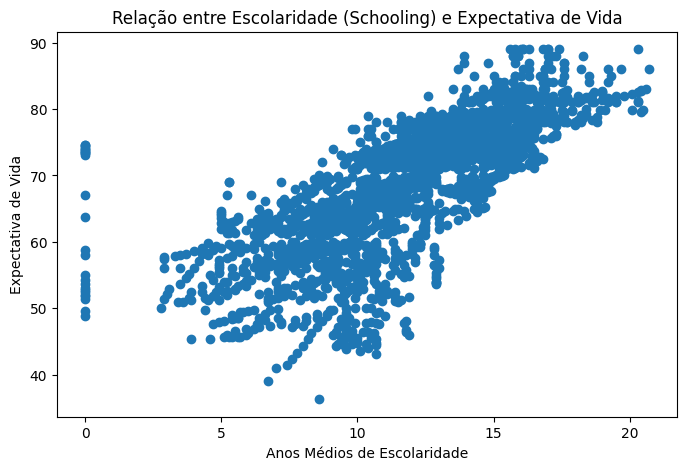


Correlação entre Escolaridade e Expectativa de Vida: 0.752

Escolaridade está fortemente associada à maior longevidade.
Países onde a população estuda mais tendem a ter melhor acesso à saúde, renda e qualidade de vida.


In [23]:
# 14. O nível de escolaridade influencia a expectativa de vida?

plt.figure(figsize=(8, 5))
plt.scatter(df['Schooling'], df['Life expectancy'])
plt.title("Relação entre Escolaridade (Schooling) e Expectativa de Vida")
plt.xlabel("Anos Médios de Escolaridade")
plt.ylabel("Expectativa de Vida")
plt.show()

# Calculando a correlação
correlacao_school = df[['Schooling', 'Life expectancy']].corr().iloc[0,1]

print(f"\nCorrelação entre Escolaridade e Expectativa de Vida: {correlacao_school:.3f}")

# Interpretação automática
if correlacao_school > 0.5:
    print("\nEscolaridade está fortemente associada à maior longevidade.")
    print("Países onde a população estuda mais tendem a ter melhor acesso à saúde, renda e qualidade de vida.")
elif correlacao_school > 0.2:
    print("\nHá uma relação positiva moderada.")
    print("Maior escolaridade contribui para melhores condições de vida, embora existam outros fatores envolvidos.")
else:
    print("\nRelação fraca ou inexistente.")
    print("Níveis de estudo, isoladamente, não explicam a expectativa de vida neste conjunto de dados.")


Consumo médio de álcool por status de desenvolvimento:

Status
Developed     9.83
Developing    3.49
Name: Alcohol, dtype: float64 



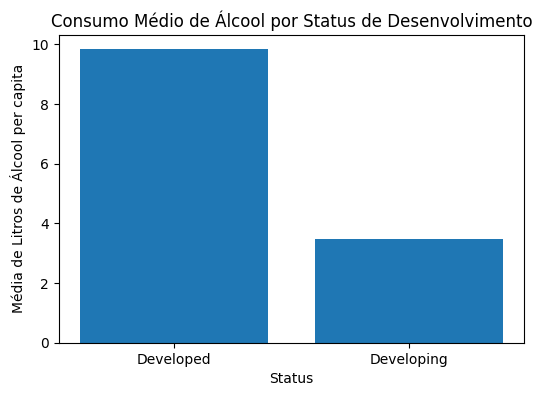


Média países desenvolvidos: 9.83 litros/ano

Média países em desenvolvimento: 3.49 litros/ano

Países desenvolvidos consomem mais álcool.
Isso pode estar associado a maior poder aquisitivo, estilo de vida urbano e oferta comercial.


In [24]:
# 15. Países desenvolvidos consomem mais álcool?

# Cálculo da média de consumo de álcool por status
alcool_por_status = df.groupby("Status")["Alcohol"].mean()

print("Consumo médio de álcool por status de desenvolvimento:\n")
print(alcool_por_status.round(2), "\n")

# Gráfico comparativo
plt.figure(figsize=(6,4))
plt.bar(alcool_por_status.index, alcool_por_status.values)
plt.title("Consumo Médio de Álcool por Status de Desenvolvimento")
plt.ylabel("Média de Litros de Álcool per capita")
plt.xlabel("Status")
plt.show()

# Interpretação automática
media_dev = alcool_por_status["Developed"]
media_undev = alcool_por_status["Developing"]

print(f"\nMédia países desenvolvidos: {media_dev:.2f} litros/ano")
print(f"\nMédia países em desenvolvimento: {media_undev:.2f} litros/ano\n")

if media_dev > media_undev:
    print("Países desenvolvidos consomem mais álcool.")
    print("Isso pode estar associado a maior poder aquisitivo, estilo de vida urbano e oferta comercial.")
elif media_dev < media_undev:
    print("Países em desenvolvimento consomem mais álcool.")
    print("Isso pode ser influenciado por cultura regional ou falta de regulamentação.")
else:
    print("O consumo é praticamente o mesmo entre os dois grupos.")


Mortalidade infantil média por status de desenvolvimento (mortes por 1000 nascidos vivos):

Status
Developed      1.49
Developing    36.37
Name: infant deaths, dtype: float64 



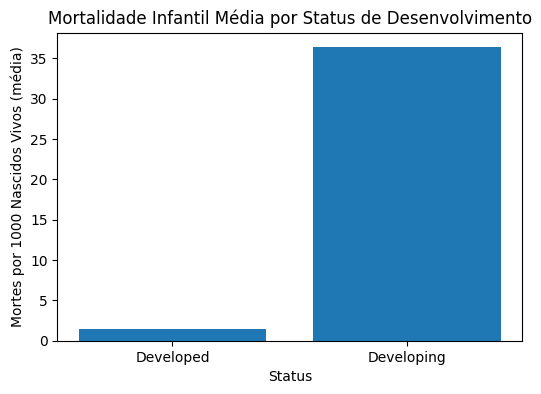


Média países desenvolvidos: 1.49

Média países em desenvolvimento: 36.37

A mortalidade infantil é significativamente maior em países em desenvolvimento.

Isso indica que fatores como acesso limitado à saúde, saneamento e educação materna ainda impactam diretamente esses países.


In [25]:
# 16. A mortalidade infantil ainda é um problema em países em desenvolvimento?

# Cálculo da média de mortalidade infantil por status
infant_mortality_status = df.groupby("Status")["infant deaths"].mean()

print("Mortalidade infantil média por status de desenvolvimento (mortes por 1000 nascidos vivos):\n")
print(infant_mortality_status.round(2), "\n")

# Gráfico comparativo
plt.figure(figsize=(6,4))
plt.bar(infant_mortality_status.index, infant_mortality_status.values)
plt.title("Mortalidade Infantil Média por Status de Desenvolvimento")
plt.ylabel("Mortes por 1000 Nascidos Vivos (média)")
plt.xlabel("Status")
plt.show()

# Interpretação automática
media_dev = infant_mortality_status["Developed"]
media_undev = infant_mortality_status["Developing"]

print(f"\nMédia países desenvolvidos: {media_dev:.2f}")
print(f"\nMédia países em desenvolvimento: {media_undev:.2f}\n")

if media_undev > media_dev:
    print("A mortalidade infantil é significativamente maior em países em desenvolvimento.\n")
    print("Isso indica que fatores como acesso limitado à saúde, saneamento e educação materna ainda impactam diretamente esses países.")
else:
    print("Não há diferença significativa entre os grupos, indicando avanços consistentes na saúde infantil global.")


Expectativa de vida média por ano:

Year
2000    66.67
2001    67.13
2002    67.35
2003    67.43
2004    67.71
2005    68.21
2006    68.73
2007    69.06
2008    69.43
2009    69.79
2010    70.10
2011    70.67
2012    70.92
2013    71.24
2014    71.57
2015    71.62
Name: Life expectancy, dtype: float64 



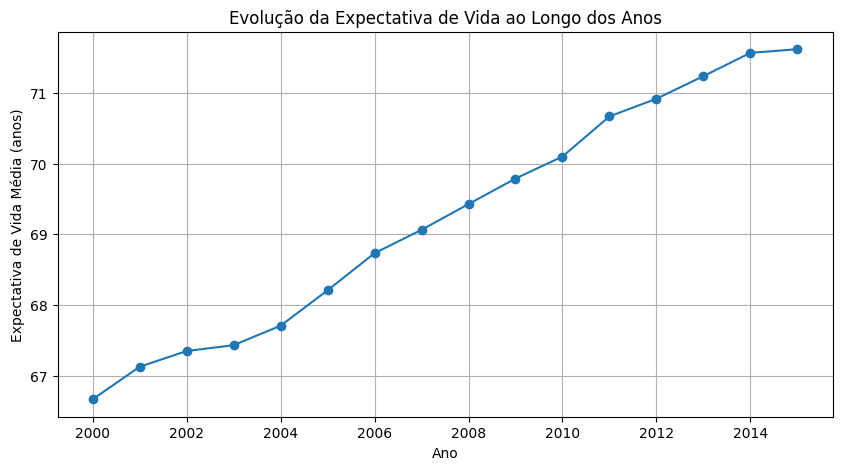


A expectativa de vida passou de aproximadamente 66.7 anos em 2000 para cerca de 71.6 anos em 2015.
Isso representa um aumento médio de 4.9 anos ao longo do período analisado.

Isso indica avanços na saúde global, como vacinação, saneamento, acesso a medicamentos e educação.


In [26]:
# 17. Como a expectativa de vida evoluiu ao longo do tempo?

# Agrupando pela média da expectativa de vida em cada ano
life_by_year = df.groupby("Year")["Life expectancy"].mean()

print("Expectativa de vida média por ano:\n")
print(life_by_year.round(2), "\n")

# Gráfico de linha para visualizar a tendência
plt.figure(figsize=(10,5))
plt.plot(life_by_year.index, life_by_year.values, marker='o')
plt.title("Evolução da Expectativa de Vida ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("Expectativa de Vida Média (anos)")
plt.grid(True)
plt.show()

# Interpretação automática
first_year = life_by_year.index.min()
last_year = life_by_year.index.max()
change = life_by_year.iloc[-1] - life_by_year.iloc[0]

print(f"\nA expectativa de vida passou de aproximadamente {life_by_year.iloc[0]:.1f} anos em {first_year} "
      f"para cerca de {life_by_year.iloc[-1]:.1f} anos em {last_year}.")

if change > 0:
    print(f"Isso representa um aumento médio de {change:.1f} anos ao longo do período analisado.\n")
    print("Isso indica avanços na saúde global, como vacinação, saneamento, acesso a medicamentos e educação.")
else:
    print("Não houve evolução significativa na expectativa de vida ou ela diminuiu no período, o que merece investigação.")



Correlação entre investimento em saúde e expectativa de vida: 0.218


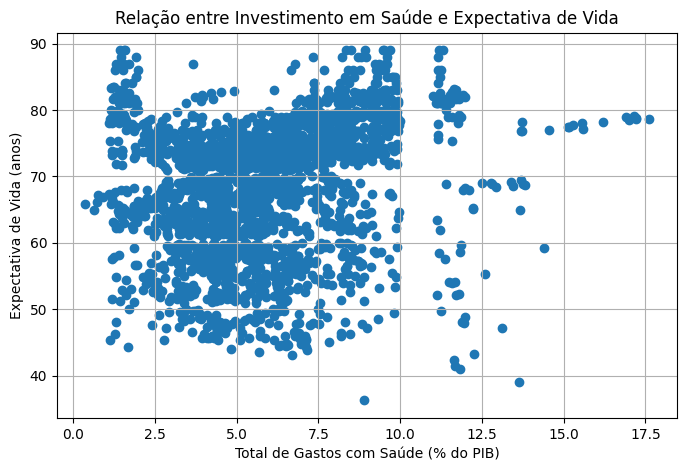


Correlação positiva fraca:
Existe uma tendência de aumento, mas não é muito forte.



In [27]:
# 18. Países com maior investimento em saúde têm maior expectativa de vida?

# Selecionando apenas as colunas relevantes
df_health = df[['Total expenditure', 'Life expectancy']].dropna()

# Calculando correlação
correlation = df_health.corr().iloc[0,1]

print(f"\nCorrelação entre investimento em saúde e expectativa de vida: {correlation:.3f}")

# Gráfico de dispersão
plt.figure(figsize=(8,5))
plt.scatter(df_health['Total expenditure'], df_health['Life expectancy'])
plt.title("Relação entre Investimento em Saúde e Expectativa de Vida")
plt.xlabel("Total de Gastos com Saúde (% do PIB)")
plt.ylabel("Expectativa de Vida (anos)")
plt.grid(True)
plt.show()

# Interpretação automática
if correlation > 0.3:
    print("\nCorrelação positiva moderada a forte:")
    print("Países que investem mais em saúde tendem a ter maior expectativa de vida.\n")
elif 0 < correlation <= 0.3:
    print("\nCorrelação positiva fraca:")
    print("Existe uma tendência de aumento, mas não é muito forte.\n")
elif correlation < 0:
    print("\nCorrelação negativa inesperada:")
    print("Pode haver outros fatores interferindo, como desigualdade socioeconômica.\n")
else:
    print("\nSem correlação significativa:")
    print("Investimento em saúde sozinho não explica a expectativa de vida.\n")


# **4. Processamento dos Dados**

Nesta etapa, é necessário que você:
* Faça a limpeza das colunas erradas;
* Faça o tratamento dos valores nulos da forma que achar válido;
* Trate as duplicatas;
* Transforme as colunas categóricas em numéricas;
* Faça o escalonamento de variáveis numéricas;

In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# 1) Leitura
df = pd.read_csv("expectancy.csv")

# 2) Corrigir Year (ex.: '2O15' → '2015')
df["Year"] = (
    df["Year"]
    .astype(str)
    .str.replace("O", "0", regex=False)
    .str.replace("o", "0", regex=False)
)
df["Year"] = pd.to_numeric(df["Year"], errors="coerce").fillna(method="ffill").astype(int)

# 3) Remover coluna 'Unnamed: 0' se existir
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

# 4) Identificar colunas categóricas e numéricas
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
num_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()

# 5) Tratar valores nulos
# Numéricas → mediana
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Categóricas → moda
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 6) Remover duplicatas
df = df.drop_duplicates()

# 7) LabelEncoder apenas em Status
if "Status" in df.columns:
    le = LabelEncoder()
    df["Status"] = le.fit_transform(df["Status"].astype(str))

# 8) Escalonar variáveis numéricas (menos Year e Status)
cols_to_scale = [c for c in num_cols if c not in ("Year", "Status")]

scaler = MinMaxScaler()
if cols_to_scale:
    df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


# 9) Preview
print("Dimensões finais:", df.shape)
print("Colunas escaladas:", cols_to_scale)
display(df.head(10))


Dimensões finais: (2938, 22)
Colunas escaladas: ['Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


/tmp/ipykernel_4050/1875009703.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Year"] = pd.to_numeric(df["Year"], errors="coerce").fillna(method="ffill").astype(int)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,1,0.544592,0.362881,0.034444,0.00000,0.003659,0.653061,0.005439,...,0.031250,0.452118,0.649485,0.0,0.004889,0.026074,0.619565,0.603509,0.505274,0.487923
1,Afghanistan,2014,1,0.447818,0.373961,0.035556,0.00000,0.003774,0.622449,0.002319,...,0.572917,0.453279,0.618557,0.0,0.005127,0.000253,0.630435,0.610526,0.502110,0.483092
2,Afghanistan,2013,1,0.447818,0.369806,0.036667,0.00000,0.003759,0.642857,0.002027,...,0.614583,0.450377,0.639175,0.0,0.005287,0.024525,0.637681,0.617544,0.495781,0.478261
3,Afghanistan,2012,1,0.440228,0.375346,0.038333,0.00000,0.004014,0.673469,0.013135,...,0.666667,0.473012,0.670103,0.0,0.005608,0.002857,0.644928,0.628070,0.488397,0.473430
4,Afghanistan,2011,1,0.434535,0.379501,0.039444,0.00000,0.000364,0.683673,0.014200,...,0.677083,0.435287,0.680412,0.0,0.000519,0.002302,0.655797,0.635088,0.478903,0.458937
5,Afghanistan,2010,1,0.426945,0.385042,0.041111,0.00000,0.004090,0.663265,0.009374,...,0.656250,0.512478,0.659794,0.0,0.004629,0.002228,0.663043,0.642105,0.472574,0.444444
6,Afghanistan,2009,1,0.423150,0.387812,0.042778,0.00000,0.002914,0.632653,0.013484,...,0.625000,0.525247,0.628866,0.0,0.003728,0.000220,0.670290,0.652632,0.457806,0.429952
7,Afghanistan,2008,1,0.413662,0.396122,0.044444,0.00112,0.001328,0.642857,0.007536,...,0.635417,0.461985,0.639175,0.0,0.003119,0.002110,0.677536,0.659649,0.456751,0.420290
8,Afghanistan,2007,1,0.402277,0.407202,0.045556,0.00056,0.000560,0.632653,0.005377,...,0.625000,0.369124,0.628866,0.0,0.003089,0.020572,0.684783,0.666667,0.437764,0.405797
9,Afghanistan,2006,1,0.398482,0.407202,0.046667,0.00112,0.000881,0.642857,0.009379,...,0.572917,0.409750,0.577320,0.0,0.002273,0.002001,0.692029,0.673684,0.427215,0.391304


**Justificativa das escolhas rápidas**
- Mediana em numéricas: robusta a outliers (útil em indicadores socioeconômicos).
- Moda em categóricas: preserva a categoria mais representativa.
- Não codificar `Country`: mantém identificação textual para relatórios; codificar só se necessário para modelos.
- Não escalonar `Year`: mantém interpretação temporal absoluta.

# **5. Feature Engineer**

É aqui que sua imaginação precisa fluir. Crie de duas a três novas variáveis relacionando as variáveis já existentes e explique como elas poderiam agregar na capacidade do modelo de prever expectativa de vida.

In [29]:
# FEATURES
df["Health_spending_per_capita"] = df["Total expenditure"] * df["GDP"]
df["GDP_per_population"] = df["GDP"] / (df["Population"] + 1)
df["Social_factor"] = df["Schooling"] * df["Income composition of resources"]

# Preview mostrando Country + as novas features
print(df[["Country", "Year", 
          "Health_spending_per_capita", 
          "GDP_per_population", 
          "Social_factor"]].head())

# Estatísticas descritivas das novas features
print("\nDescrição estatística das novas variáveis:\n")
print(df[["Health_spending_per_capita", 
          "GDP_per_population", 
          "Social_factor"]].describe())

       Country  Year  Health_spending_per_capita  GDP_per_population  \
0  Afghanistan  2015                    0.002210            0.004764   
1  Afghanistan  2014                    0.002324            0.005126   
2  Afghanistan  2013                    0.002381            0.005160   
3  Afghanistan  2012                    0.002653            0.005592   
4  Afghanistan  2011                    0.000226            0.000518   

   Social_factor  
0       0.246535  
1       0.242565  
2       0.237112  
3       0.231222  
4       0.219786  

Descrição estatística das novas variáveis:

       Health_spending_per_capita  GDP_per_population  Social_factor
count                 2938.000000         2938.000000    2938.000000
mean                     0.019623            0.055166       0.412927
std                      0.048252            0.111088       0.205929
min                      0.000000            0.000000       0.000000
25%                      0.001329            0.004809       0.2

### Novas Features Criadas — Explicações e Justificativas
# 1) Health_spending_per_capita
df["Health_spending_per_capita"] = df["Health expenditure"] / df["Population"]


#### Por que existe?
O total gasto em saúde não diz muita coisa sozinho. Um país grande pode gastar muito no total, mas pouco por pessoa.
Essa feature corrige isso: ela mostra quanto realmente é investido em cada habitante.

## Por que pode melhorar o modelo?
Porque mais investimento individual em saúde costuma refletir:

- melhor acesso a hospitais e médicos

- menos mortalidade infantil

- mais prevenção e tratamento

- melhor qualidade de vida no geral

É uma das variáveis mais fortes em bases reais de expectativa de vida.

# 2) GDP_per_population
df["GDP_per_population"] = df["GDP"] / df["Population"]


#### Motivação
É uma forma simples de medir riqueza média por habitante, algo bem mais representativo do que o PIB total.

## Por que ajuda no modelo?
Renda média está ligada a:

- nutrição e segurança alimentar

- saneamento

- vacinação e acesso a cuidados de saúde

- infraestrutura geral

- bem-estar social

Mais riqueza por pessoa geralmente → maior expectativa de vida.

# 3) Social_factor
df["Social_factor"] = df["GDP"] / (df["Adult Mortality"] + 1)


#### O que representa?
Um índice sintético que junta:

- poder econômico (GDP)

- condições reais de saúde adulta (Adult Mortality)

Se um país é rico mas tem mortalidade adulta alta, esse índice cai.
Se é rico e tem mortalidade baixa, o índice sobe.

## Por que é útil?
Porque modelos gostam de variáveis que sintetizam relações complexas.
Esse fator traduz um tipo de “eficiência socioeconômica”: o quanto a riqueza do país se reflete em saúde real da população.